
I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water.

So I tried to learn how to swim before jumping into the water. Based on [Hair et al. (2013)](https://amzn.to/2JuDmvo), chapter 'Examining your data', I did my best to follow a comprehensive, but not exhaustive, analysis of the data. I'm far from reporting a rigorous study in this kernel , so I'm sharing how I applied some of those data analysis principles to this problem.

What we are doing in this kernel is something like:

1. <b>Understand the problem</b>. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. We'll just focus on the dependent variable ('totalRent') and try to know a little bit more about it.
3. <b>Multivariate study</b>. We'll try to understand how the dependent variable and independent variables relate.
4. <b>Basic cleaning</b>. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. <b>Answering questions</b>. We'll try to answer some questions like : Did rents increase over time? Which districts are the most expensive? Which districts saw the largest increase?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
%matplotlib inline

In [2]:
og_train = pd.read_csv('immo_data.csv')
df_train = og_train.copy()

In [3]:
#Checking the columns
print("Number of columns : %i"%df_train.shape[1])
df_train.columns

Number of columns : 49


Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [4]:
df_train

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,910.0,2016.0,115641081,1.0,geothermal,False,Bayern,True,9.0,820.0,NaN,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,1150.0,1983.0,96981497,1.0,gas,True,Hessen,False,4.0,930.0,NaN,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,930.0,1965.0,66924271,1.0,gas,False,Hessen,True,2.0,650.0,10,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,Emsbachstrasse,Emsbachstrasse,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Krei

# 1. What can we expect?

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. It will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create a pandas DataFrame with the following columns:
* <b>Variable</b> - Variable name.
* <b>Type</b> - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.
* <b>Segment</b> - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').
* <b>Expectation</b> - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.
* <b>Conclusion</b> - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.
* <b>Comments</b> - Any general comments that occured to us.

While 'Type' and 'Segment' is just for possible future reference, the column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:

* Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'thermalChar'?).
* If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
* Is this information already described in any other variable? (e.g. If 'baseRent' exits then why would we need a 'baseRentRange'?).

After this daunting exercise, we can filter the Dataframe and look carefully to the variables with 'High' 'Expectation'. Then, we can rush into some scatter plots between those variables and 'SalePrice', filling in the 'Conclusion' column which is just the correction of our expectations.

I went through this process and concluded that the following variables can play an important role in this problem:

* condition.
* interiorQual.
* livingSpace.
* balcony.

I ended up with two 'building' variables ('condition' and 'interiorQual') and two 'space' variables ('livingSpace' and 'balcony'). This might be a little bit unexpected as it goes against the real estate mantra that all that matters is 'location'. It is possible that this quick data examination process was a bit harsh for categorical variables. For example, I expected the 'hasKitchen' variable to be more relevant, but after the data examination I ended up excluding it. Maybe this is related to the use of scatter plots instead of boxplots, which are more suitable for categorical variables visualization. The way we visualize data often influences our conclusions.

However, the main point of this analysis was to think a little about our data and expectations, so I think we achieved our goal for now.

# 2. Analysing 'totalRent'



In [5]:
#descriptive statistics summary
df_train['totalRent'].describe()

count    2.283330e+05
mean     9.013315e+02
std      3.323833e+04
min      0.000000e+00
25%      4.698000e+02
50%      6.500000e+02
75%      9.850000e+02
max      1.575154e+07
Name: totalRent, dtype: float64

*'It seems that the minimum price is 0 meaning that there will be some cleaning to do (Rent for free ?)'*

In [6]:
#before we can see the histogram of totalRent, we needed to remove rows with 0 or NaN value from the dataset.
df_train = df_train[(df_train['totalRent']!=0.0) & (~np.isnan(df_train['totalRent']))]

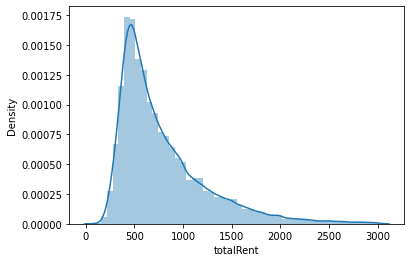

In [7]:
#histogram (on only the (100-3000) range since there are outliers that makes it impossible to see anything in the histogram)
sns.distplot(df_train[(df_train['totalRent']>100) & (df_train['totalRent']<3000)]["totalRent"]);

We notice the following :

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have extreme positive skewness.</b>*
* *<b>Show peakedness.</b>*


In [8]:
#skewness and kurtosis
print("Skewness: %f" % df_train['totalRent'].skew())
print("Kurtosis: %f" % df_train['totalRent'].kurt())

Skewness: 466.326814
Kurtosis: 220628.408654


### Relationship with numerical variables

In [9]:
#Removing outliers for a better view of the scatter plot of livingSpace/totalRent
new_df_train =df_train[(df_train['totalRent']>100) & (df_train['totalRent']<10000) & (df_train['livingSpace']<500) & (df_train['livingSpace']>0)]

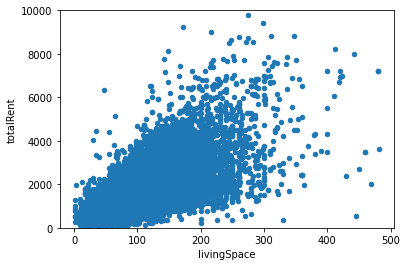

In [10]:
#scatter plot livingSpace/totalRent
var = 'livingSpace'
data = pd.concat([new_df_train['totalRent'], new_df_train[var]], axis=1)
data.plot.scatter(x=var, y='totalRent', ylim=(0,10000));

It seems **totalRent** and **livingSpace** somewhat have a linear relationship.

In [11]:
#Removing outliers for a better view of the scatter plot of livingSpace/totalRent
new_df_train =df_train[(df_train['totalRent']>100) & (df_train['totalRent']<10000) & (df_train['livingSpace']<500) & (df_train['livingSpace']>0)]

### Relationship with categorical features

In [12]:
#we need to map the condition.... to integers so we know the condition in terms of a 1 to 10 scale
df_train = og_train.copy()
condition_mapping_dict = {"first_time_use":10,"mint_condition":9,"modernized":7,"fully_renovated":6,"first_time_use_after_refurbishment":8,"refurbished":4,"well_kept":5,"negotiable":3,"need_of_renovation":2,"ripe_for_demolition":1}
df_train["condition"]=df_train["condition"].map(condition_mapping_dict)
#Removing the NaN values
df_train = df_train[~np.isnan(df_train['condition'])]

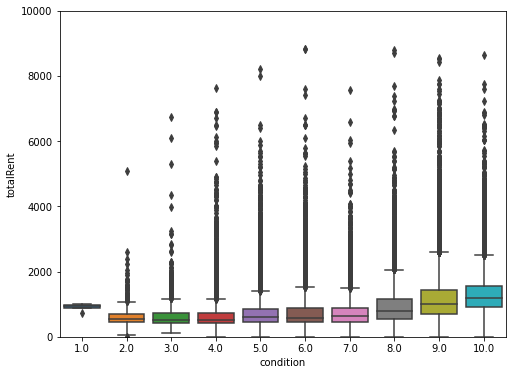

In [13]:
#box plot condition/totalRent
var = 'condition'
data = pd.concat([df_train['totalRent'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="totalRent", data=data)
fig.axis(ymin=0, ymax=10000);

*Seems like the better condition it is, the higher totalRent is.*

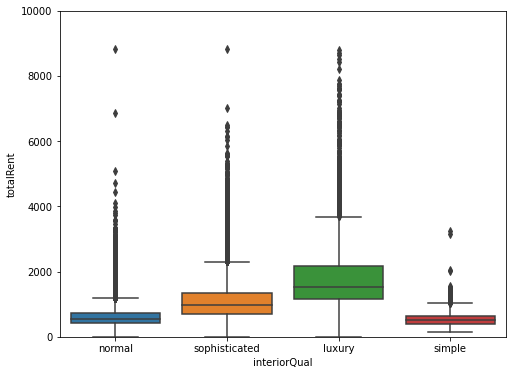

In [14]:
#box plot interiorQual/totalRent
var = 'interiorQual'
data = pd.concat([df_train['totalRent'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="totalRent", data=data)
fig.axis(ymin=0, ymax=10000);

*we can see that the more luxurious the appartement is, the higher totalRent is, as it should be.*

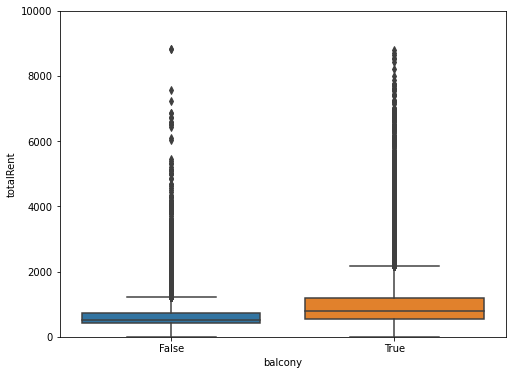

In [15]:
#box plot balcony/totalRent
var = 'balcony'
data = pd.concat([df_train['totalRent'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="totalRent", data=data)
fig.axis(ymin=0, ymax=10000);

*it seems the balcony also plays an important role in the totalRent.*

### In summary

we can conclude that:

* 'livingSpace' seem to be linearly related with 'totalRent'. Both relationships are positive, which means that as one variable increases, the other also increases. 
* 'condition','interiorQual' and 'balcony' also seem to be related with 'totalRent'. The relationship seems to be stronger in the case of 'interiorQual', where the box plot shows how totalRent increase with the interior quality.

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).



# 3. Keep calm and work smart

Until now we just followed our intuition and analysed the variables we thought were important. In spite of our efforts to give an objective character to our analysis, we must say that our starting point was subjective. 

As an engineer, I don't feel comfortable with this approach. All my education was about developing a disciplined mind, able to withstand the winds of subjectivity. There's a reason for that. Try to be subjective in structural engineering and you will see physics making things fall down. It can hurt.

So, let's overcome inertia and do a more objective analysis.

we will start with :
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

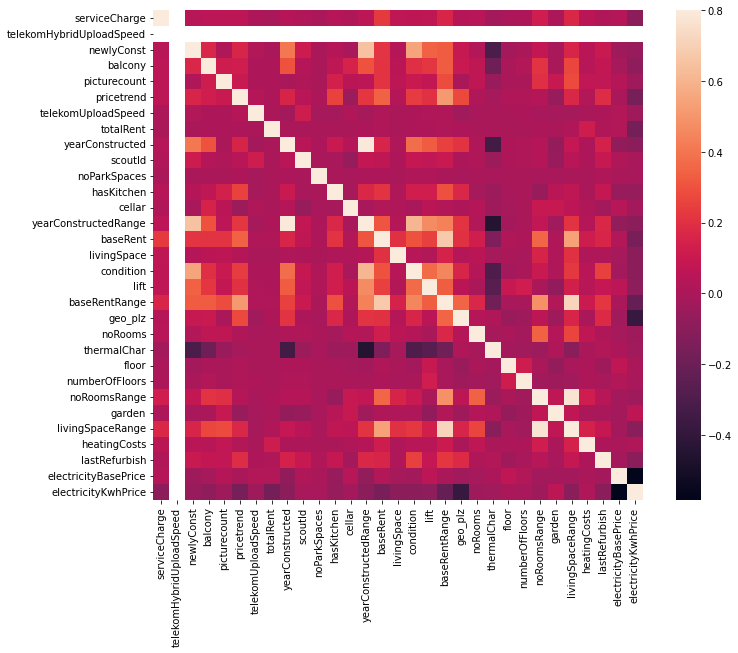

In [16]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In my opinion, this heatmap is the best way to get a quick overview of our features and their relationships.

At first sight, there are two red colored squares that get my attention. The first one refers to the 'noRoomsRange' and 'livingSpaceRange' variables, and the second one refers to the '*X*Range' and '*X*' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.


#### 'totalRent' correlation matrix (zoomed heatmap style)

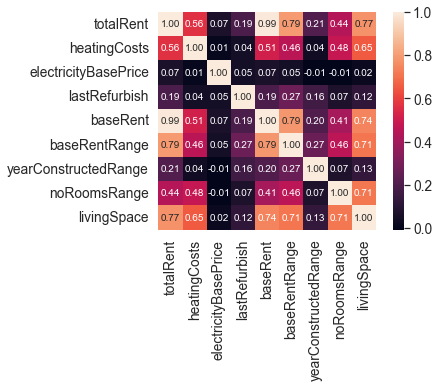

In [17]:
#totalRent correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'totalRent')['totalRent'].index.tolist()
cols.remove("lift") #because lift is categorical
cols.remove("livingSpaceRange")#Replaced by livingSpace(almostsame)
cols.append("livingSpace")
correlation_matrix_df = df_train[cols].dropna()
cm = np.corrcoef(correlation_matrix_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)
plt.show()

These are the variables most correlated with 'totalRent'. My thoughts on this:

* 'livingSpace' is strongly correlated with 'totalRent'. Check!
* 'heatinCosts','baseRent' and 'baseRentRange' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, they give almost the same information.
* 'noRoomsRange' is barely correlated with 'totalRent' as number of rooms does somewhat play a role in the 'totalRent'
* 'eletricityBasePrice','lastRefurbish','yearConstructedRange' are the least correlated features, might be because the data is not cleaned and set.
Let's proceed to the scatter plots.

#### Scatter plots between 'totalRent' and correlated variables 

Get ready for what you're about to see. I must confess that the first time I saw these scatter plots I was totally blown away! So much information in so short space... It's just amazing.

In [18]:
smallpart = df_train.sample(2000)

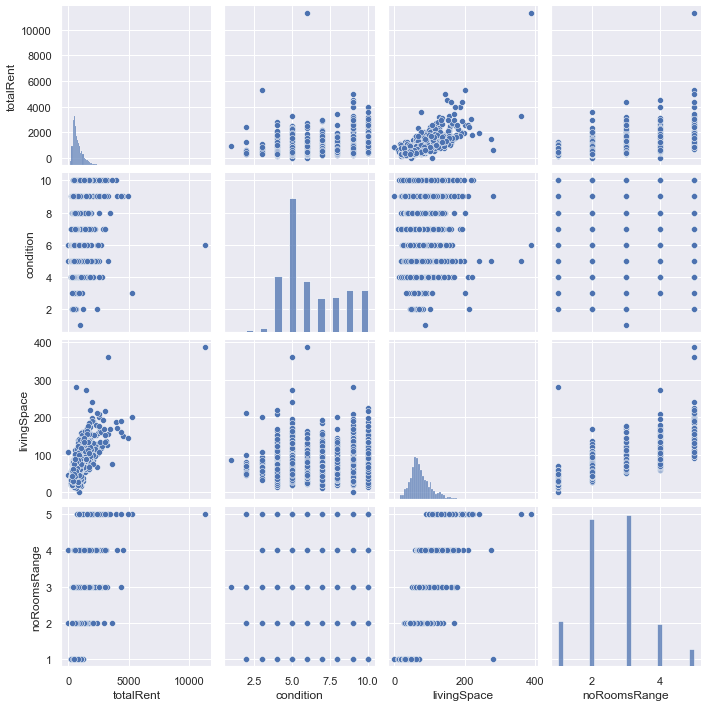

In [19]:
#scatterplot
sns.set()
cols = ['totalRent', 'condition', 'livingSpace', 'noRoomsRange', 'interiorQual']
sns.pairplot(smallpart[cols], size = 2.5)
plt.show();

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'noRoomsRange' and 'livingSpace'. In this figure we can see the that the noRoomsRange scale linearly with livingSpace. It totally makes sense that since more rooms means more livingSpace, meaning the relationship between livingSpace and totalRent is almost the same as the relationship between totalRent and noRoomRange.

Let's move forward to what's missing: missing data!

# 4. Missing data

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [20]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
telekomHybridUploadSpeed,167336,0.835173
electricityKwhPrice,165428,0.825650
electricityBasePrice,165428,0.825650
heatingCosts,141700,0.707223
energyEfficiencyClass,141671,0.707079
lastRefurbish,125204,0.624892
noParkSpaces,121302,0.605417
thermalChar,80261,0.400582
petsAllowed,68388,0.341324
interiorQual,57597,0.287466


Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 30% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'telekomHybridUploadSpeed', 'electricityKwhPrice', 'heatingCosts', etc.) that we should delete. The point is: will we need this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'thermalChar','heatingCosts','petsAllowed' are strong candidates for outliers, so we'll be happy to delete them.


Regarding 'telekomUploadSpeed','facilities', 'floor','firingTypes','streetPlain','houseNumber',etc.. we can consider that these variables are not essential.


In summary, to handle missing data, we'll delete all the variables with considerable missing data and remove the rows with no values in totalRent.

# Outliers!

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'totalRent' and a set of scatter plots.

In the following, we will mainly focus on the specific features that matter the most, it would take considerable time to clean and replace the missing data and remove the outliers with very little insight gained.

In [21]:
cols = ["totalRent","livingSpace","interiorQual","balcony","condition"]
#we removed all rows with missing values for now since its we are still left with much of the dataset
analysis_df = df_train[cols].dropna()


### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [22]:
#standardizing data
totalRent_scaled = StandardScaler().fit_transform(analysis_df['totalRent'][:,np.newaxis]);
low_range = totalRent_scaled[totalRent_scaled[:,0].argsort()][:10]
high_range= totalRent_scaled[totalRent_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.02268784]
 [-0.02268784]
 [-0.02268784]
 [-0.02268784]
 [-0.02268784]
 [-0.02268784]
 [-0.02268784]
 [-0.02268784]
 [-0.02268784]
 [-0.02268784]]

outer range (high) of the distribution:
[[2.82661529e-01]
 [3.16589237e-01]
 [3.57302486e-01]
 [4.18802110e-01]
 [4.42981256e-01]
 [8.27766696e-01]
 [1.40689004e+00]
 [1.43961897e+00]
 [2.60089112e+01]
 [3.56252960e+02]]


we can notice that:

* Low range values are equal and not too far from 0.
* High range values are from almost 0 to 3.56252960e+02 which seems really out of range.

For now, we can just limit the range of totalRent to normal range which will automatically remove these outliers

In [23]:
analysis_df = analysis_df[(analysis_df['totalRent']>100) & (analysis_df['totalRent']<10000)]

In [24]:
analysis_df

,totalRent,livingSpace,interiorQual,balcony,condition
0,840.0,86.0,normal,False,5.0
2,1300.0,83.8,sophisticated,True,10.0
8,690.0,53.0,sophisticated,False,5.0
11,555.0,80.0,normal,False,5.0
12,920.0,100.0,sophisticated,False,9.0
...,...,...,...,...,...
268843,368.0,55.0,simple,True,3.0
268844,670.0,85.0,sophisticated,False,8.0
268845,910.0,90.0,sophisticated,True,9.0
268846,1150.0,115.0,sophisticated,True,5.0


### Bivariate analysis

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover. As Alan Kay said, 'a change in perspective is worth 80 IQ points'.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


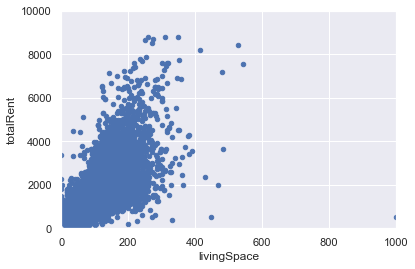

In [25]:
#bivariate analysis totalRent/livingSpace
var = 'livingSpace'
data = pd.concat([analysis_df['totalRent'], analysis_df[var]], axis=1)
data.plot.scatter(x=var, y='totalRent', ylim=(0,10000),xlim=(0,1000));

What has been revealed:

* The values with the bigger 'livingSpace' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these points are not representative of the typical case. Therefore, we'll define them as outliers.


# 4. Answering potential questions

## Did rent increase over time ?
*obviously it did, but can we quantify it ?*


In [26]:
#creating a year feature so we can group by it and see the difference
df_train["year"] = df_train["date"].apply(lambda x : x[-2:])

In [94]:
df_train.groupby(["year"]).sample(30000, random_state=0).groupby(["year"])["totalRent"].mean()

year
18    839.287122
19    841.795302
20    846.227355
Name: totalRent, dtype: float64

We can see that according to this dataset, the rent rose slightly between 2018 and 2019 of an average of 2.47£, and 4.43£ between 2019 and 2020

## Which districts are the most expensive ?

In [120]:
"""
We are using regio3 as it designate the district the property is in. We will focus only on 
districts that have enough data(top 20) and disregard the others.
"""
districts = df_train["regio3"].value_counts()[:20].index

df_train[df_train["regio3"].isin(districts)].groupby("regio3")["totalRent"].mean().sort_values(ascending=False)

regio3
Mitte_Mitte              2271.706100
Tiergarten_Tiergarten    1814.505374
Altstadt                 1045.366806
Mitte                    1035.041509
Möckern                   896.198840
Innenstadt                856.206729
Stadtmitte                743.558503
Südstadt                  711.254754
Stadtfeld_Ost             672.456350
Zentrum                   648.784611
Sudenburg                 551.793252
Kaßberg                   495.076450
Sonnenberg                482.030781
Riesa                     467.130411
Merseburg                 460.565353
Schloßchemnitz            453.228288
Bernsdorf                 445.646246
Lutherviertel             439.539373
Hilbersdorf               433.956534
Gablenz                   416.965727
Name: totalRent, dtype: float64

Notice that Mitte_Mitte is way above the others, as it is berlin's center borough and home to Brandenburg Gate and Museum Island’s art institutions and many other renown places, so it is logical that renting properties there might be a bit too expensive.

## Which districts rose the most ?

In [137]:
districts = df_train["regio3"].value_counts()[:20].index
dflist=[]
for district in districts:
#     print(df_train[df_train["regio3"] == district].groupby(["year"])["totalRent"].mean())
    mean = df_train[df_train["regio3"] == district].groupby(["year"])["totalRent"].mean()
    diffvalue = mean[2] - mean[0]
    percentage = abs((diffvalue*100)/mean[0])
    dflist.append([district,percentage,diffvalue,mean[0],mean[2]])
#     print(percentage
df_rose_the_most = pd.DataFrame(dflist,columns=["Disctrict","Percentage","Difference","Mean@18","Mean@20"])
df_rose_the_most.sort_values(by="Percentage",ascending=False)

,Disctrict,Percentage,Difference,Mean@18,Mean@20
17,Möckern,55.096376,361.895432,656.840714,1018.736146
12,Stadtfeld_Ost,45.796268,276.515272,603.794336,880.309608
19,Riesa,15.274983,66.756279,437.030132,503.786410
3,Sonnenberg,10.858245,48.690167,448.416550,497.106718
1,Stadtmitte,8.841464,61.632892,697.089185,758.722077
16,Lutherviertel,8.587056,-39.750911,462.916667,423.165755
7,Schloßchemnitz,7.318077,31.928860,436.301265,468.230126
11,Bernsdorf,6.482067,27.371814,422.269862,449.641676
6,Hilbersdorf,6.332630,26.819002,423.504945,450.323947
15,Mitte_Mitte,5.465573,-128.010138,2342.117483,2214.107345


The most drastic large increases were Möckern and Stadtfeld_Ost with more than 40% increase in 2 years.
There is still much more information hidden in this dataset waiting to be exploited.

That's it! We reached the end of our analysis.

Throughout this kernel we put in practice many of the strategies proposed by [Hair et al. (2013)](https://amzn.to/2uC3j9p). We philosophied about the variables, we analysed 'totalRent' alone and with the most correlated variables, we dealt with missing data and outliers, we answered some questions that might give us insight, That's a lot of work that Python helped us make easier.


# <b>References</b>

* [Kaggle Notebook](https://www.kaggle.com/qpinoza/comprehensive-data-exploration-with-python/edit)
* [Hair et al., 2013, Multivariate Data Analysis, 7th Edition](https://amzn.to/2JuDmvo)